MSE: 275.57
R²: 0.95


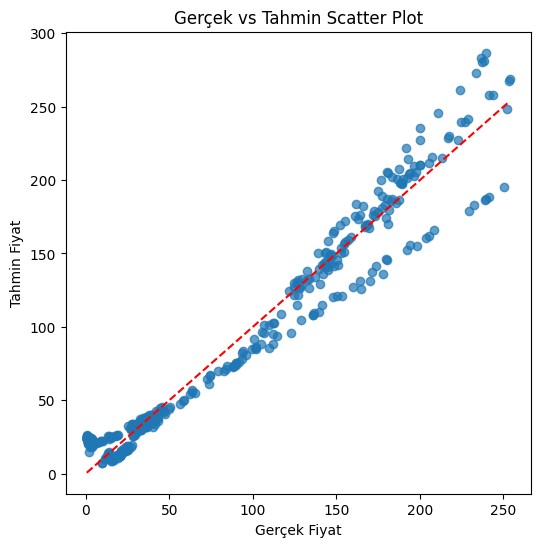

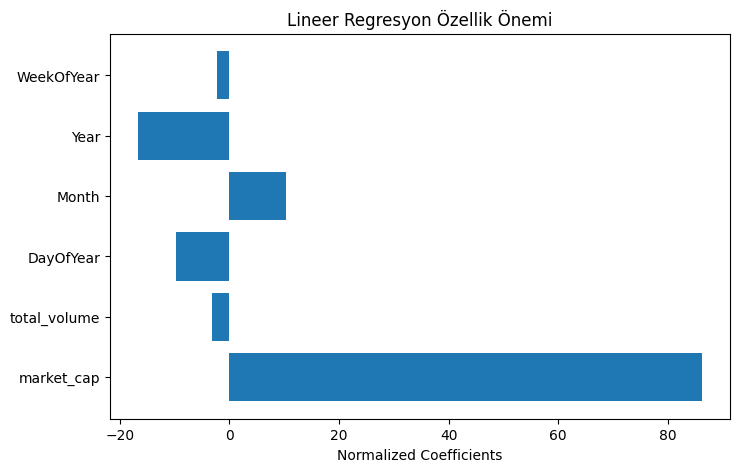


🌲 RANDOM FOREST RESULTS
MSE: 3.96
R² : 1.00


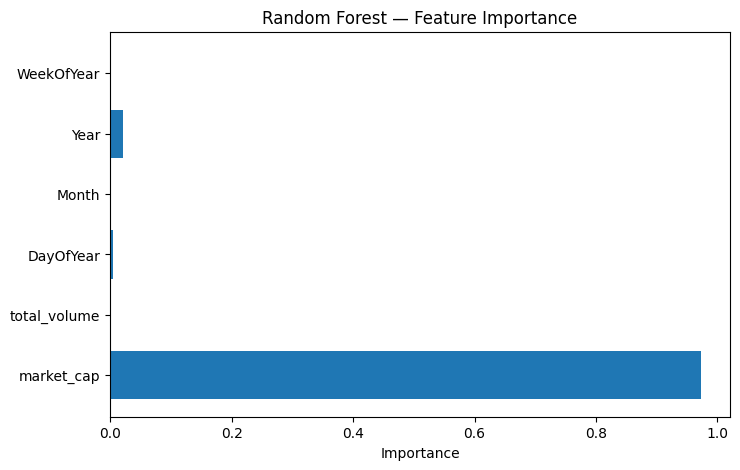


🚀 XGBOOST RESULTS
MSE: 12.29
R² : 1.00


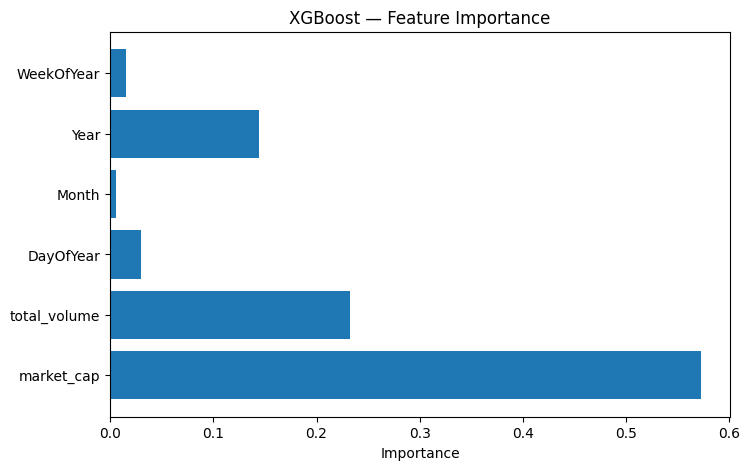

In [4]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Veri Yükleme
file_path = '/content/sol-usd-max.csv'
df = pd.read_csv(file_path)

# 2️⃣ Tarih kolonunu datetime formatına çevirme ve yeni özellikler ekleme
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['DayOfYear'] = df['snapped_at'].dt.dayofyear
df['Month'] = df['snapped_at'].dt.month
df['Year'] = df['snapped_at'].dt.year
df['WeekOfYear'] = df['snapped_at'].dt.isocalendar().week

# 3️⃣ Target ve feature'ları belirleme
target = 'price'
features = ['market_cap', 'total_volume', 'DayOfYear', 'Month', 'Year', 'WeekOfYear']

X = df[features]
y = df[target]

# 4️⃣ Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Modeli oluşturma ve eğitme
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 6️⃣ Tahmin
y_pred = lin_reg.predict(X_test)

# 7️⃣ Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# 8️⃣ Scatter plot: Gerçek vs Tahmin
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Fiyat')
plt.title('Gerçek vs Tahmin Scatter Plot')
plt.show()

# 9️⃣ Özellik önem grafiği (katsayıları normalize ederek)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)
coefficients = model_scaled.coef_

plt.figure(figsize=(8,5))
plt.barh(features, coefficients)
plt.xlabel('Normalized Coefficients')
plt.title('Lineer Regresyon Özellik Önemi')
plt.show()

# 🌲 RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

# Modeli oluştur
rf_model = RandomForestRegressor(
    n_estimators=300,     # Ağaç sayısı
    max_depth=None,       # Derinlik (None → otomatik)
    random_state=42
)

# Eğit
rf_model.fit(X_train, y_train)

# Tahmin
rf_pred = rf_model.predict(X_test)

# Performans
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n🌲 RANDOM FOREST RESULTS")
print(f"MSE: {rf_mse:.2f}")
print(f"R² : {rf_r2:.2f}")

# Özellik önemi grafiği
plt.figure(figsize=(8,5))
plt.barh(features, rf_model.feature_importances_)
plt.title("Random Forest — Feature Importance")
plt.xlabel("Importance")
plt.show()

# 🚀 XGBOOST REGRESSOR
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,        # ağaç sayısı
    learning_rate=0.05,      # daha stabil öğrenme
    max_depth=6,             # ağaç derinliği
    subsample=0.8,           # overfit engeli
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

# Eğit
xgb_model.fit(X_train, y_train)

# Tahmin
xgb_pred = xgb_model.predict(X_test)

# Performans
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("\n🚀 XGBOOST RESULTS")
print(f"MSE: {xgb_mse:.2f}")
print(f"R² : {xgb_r2:.2f}")

# Özellik önemi grafiği
plt.figure(figsize=(8,5))
plt.barh(features, xgb_model.feature_importances_)
plt.title("XGBoost — Feature Importance")
plt.xlabel("Importance")
plt.show()




In [3]:
!pip install xgboost
